In [1]:
# Author: Tyler Chen
# The majority of this code was created for CPSC 501 using the same dataset
# As I was given the opportunity to choose whatever dataset I desired.

import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

2022-12-06 02:31:54.824892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 02:31:55.179421: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-06 02:31:56.064287: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/include:/usr/local/cuda/lib64::/usr/local/cuda/extras/CUPTI/lib64
2022-12-06 02:31:56.064412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

Set the random seed.
Then Clean data

In [2]:
tf.random.set_seed(1234)

print("--load data--")
df = pd.read_csv('project_data1.csv', index_col=0)

x = df.drop(['winrate', 'wins', 'losses'], axis=1)
y = df.drop(['age', 'matches', 'tournaments', 'wins', 'losses'], axis=1)
# tf.convert_to_tensor(df)

--load data--


View our cleaned data. Data was cleaned in another file. Though any empty rows with ages being blank was removed.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)
print(x_train)
print(y_train)



      age  matches  tournaments
391    20      173           27
1569   24      174           28
1701   21      169           20
402    18       96           20
621    20       52            9
...   ...      ...          ...
1960   18      135           16
1948   30      145           29
92     20       94           21
1932   18      234           38
892    19      140           22

[808 rows x 3 columns]
       winrate
391   0.612717
1569  0.643678
1701  0.550296
402   0.552083
621   0.480769
...        ...
1960  0.614815
1948  0.537931
92    0.478723
1932  0.551282
892   0.592857

[808 rows x 1 columns]


Describe our data

In [4]:
x_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,808.0,22.981436,3.557759,15.0,20.0,23.0,25.0,37.0
matches,808.0,170.058168,97.534960,1.0,104.0,158.0,224.0,729.0
tournaments,808.0,28.037129,13.735548,1.0,19.0,27.0,37.0,83.0


In [5]:
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
winrate,808.0,0.576933,0.089507,0.0,0.528302,0.574154,0.629125,1.0


Creating our normalization layer

In [6]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))
print(normalizer.mean.numpy())

first = np.array(x_train[:1])

# Show you an example
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

2022-12-06 02:31:58.228235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-06 02:31:58.333502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-06 02:31:58.333606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-06 02:31:58.334613: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

[[ 22.981436 170.05815   28.037128]]
First example: [[ 20 173  27]]

Normalized: [[-0.84  0.03 -0.08]]


Visualize Data

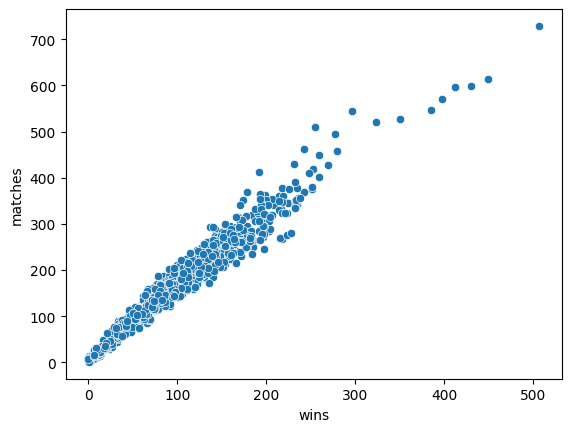

In [7]:
scatter_plt = sns.scatterplot(data=df, x="wins", y="matches")
plt.show()

We see that winrate = wins/matches 

In [8]:
#Want to create linear regression model
model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(1)
])

#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


#mean_absolute_error when you take 3 cards and guess what they could be. Average of the difference is the mean absolute error
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
model.fit(x_train, y_train, epochs=100, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100


2022-12-06 02:32:01.321258: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


26/26 - 2s - loss: 0.5753 - mae: 0.5753 - val_loss: 0.4407 - val_mae: 0.4407 - 2s/epoch - 61ms/step
Epoch 2/100
26/26 - 0s - loss: 0.3189 - mae: 0.3189 - val_loss: 0.2596 - val_mae: 0.2596 - 99ms/epoch - 4ms/step
Epoch 3/100
26/26 - 0s - loss: 0.2133 - mae: 0.2133 - val_loss: 0.1961 - val_mae: 0.1961 - 100ms/epoch - 4ms/step
Epoch 4/100
26/26 - 0s - loss: 0.1666 - mae: 0.1666 - val_loss: 0.1551 - val_mae: 0.1551 - 93ms/epoch - 4ms/step
Epoch 5/100
26/26 - 0s - loss: 0.1320 - mae: 0.1320 - val_loss: 0.1182 - val_mae: 0.1182 - 95ms/epoch - 4ms/step
Epoch 6/100
26/26 - 0s - loss: 0.1015 - mae: 0.1015 - val_loss: 0.0943 - val_mae: 0.0943 - 93ms/epoch - 4ms/step
Epoch 7/100
26/26 - 0s - loss: 0.0817 - mae: 0.0817 - val_loss: 0.0819 - val_mae: 0.0819 - 89ms/epoch - 3ms/step
Epoch 8/100
26/26 - 0s - loss: 0.0712 - mae: 0.0712 - val_loss: 0.0746 - val_mae: 0.0746 - 102ms/epoch - 4ms/step
Epoch 9/100
26/26 - 0s - loss: 0.0664 - mae: 0.0664 - val_loss: 0.0707 - val_mae: 0.0707 - 97ms/epoch - 4ms

In [9]:
print("--Evaluate model--")
model_loss1, model_acc1 = model.evaluate(x_train,  y_train, verbose=2)
model_loss2, model_acc2 = model.evaluate(x_test,  y_test, verbose=2)
print(f"Train / Test Accuracy: {model_acc1*100:.1f}% / {model_acc2*100:.1f}%")

--Evaluate model--
26/26 - 0s - loss: 0.0544 - mae: 0.0544 - 80ms/epoch - 3ms/step
7/7 - 0s - loss: 0.0634 - mae: 0.0634 - 29ms/epoch - 4ms/step
Train / Test Accuracy: 5.4% / 6.3%


Basic Prediction Test

In [10]:
x_pred = np.array([
    [23.084158, 167.158416, 27.318069], #age  matches  tournaments
]) #winrate = 98 wins / 167 matches = 0.58
prediction = model.predict(x_pred)
print("X=%s, Predicted=%s" % (x_pred[0], prediction[0]))

1/1 [==============================] - 0s 53ms/step
X=[ 23.084158 167.158416  27.318069], Predicted=[0.60504407]


Now, Visualize multiple points

In [11]:
x_pred = np.array([
    [23.084158, 67.158416, 27.318069], #age  matches  tournaments
    [23.084158, 167.158416, 27.318069], #age  matches  tournaments
    [23.084158, 267.158416, 27.318069], #age  matches  tournaments
    [23.084158, 367.158416, 27.318069], #age  matches  tournaments
    [23.084158, 467.158416, 27.318069], #age  matches  tournaments
    [23.084158, 567.158416, 27.318069], #age  matches  tournaments
]) 
prediction = model.predict(x_pred)

for i in range(x_pred[:, 0].size):
    print("X=%s, Predicted Winrate=%s" % (x_pred[i], prediction[i]))

1/1 [==============================] - 0s 17ms/step
X=[23.084158 67.158416 27.318069], Predicted Winrate=[0.52899486]
X=[ 23.084158 167.158416  27.318069], Predicted Winrate=[0.6050441]
X=[ 23.084158 267.158416  27.318069], Predicted Winrate=[0.63224864]
X=[ 23.084158 367.158416  27.318069], Predicted Winrate=[0.64844733]
X=[ 23.084158 467.158416  27.318069], Predicted Winrate=[0.6666465]
X=[ 23.084158 567.158416  27.318069], Predicted Winrate=[0.6848455]


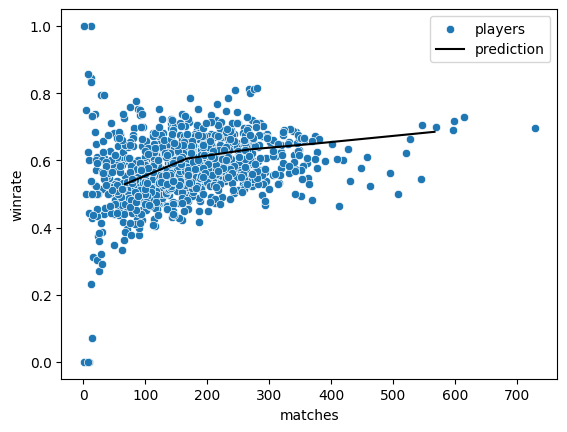

In [12]:
scatter_plt = sns.scatterplot(data=df, x="matches", y="winrate")
plt.plot(x_pred[: , 1], prediction, color='k')
plt.legend(labels=['players', 'prediction'])

In [49]:
x_pred = np.array([
    [10, 171.061881, 27.318069], #age  matches  tournaments
    [15, 171.061881, 27.318069], #age  matches  tournaments
    [20, 171.061881, 27.318069], #age  matches  tournaments
    [25, 171.061881, 27.318069], #age  matches  tournaments
    [30, 171.061881, 27.318069], #age  matches  tournaments
    [35, 171.061881, 27.318069], #age  matches  tournaments
]) 
prediction = model.predict(x_pred)

for i in range(x_pred[:, 0].size):
    print("X=%s, Predicted Winrate=%s" % (x_pred[i], prediction[i]))

1/1 [==============================] - 0s 37ms/step
X=[ 10.       171.061881  27.318069], Predicted Winrate=[0.5413558]
X=[ 15.       171.061881  27.318069], Predicted Winrate=[0.5629739]
X=[ 20.       171.061881  27.318069], Predicted Winrate=[0.5877101]
X=[ 25.       171.061881  27.318069], Predicted Winrate=[0.58282346]
X=[ 30.       171.061881  27.318069], Predicted Winrate=[0.5950735]
X=[ 35.       171.061881  27.318069], Predicted Winrate=[0.57336146]


Int64Index([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
            32, 33, 34, 35, 36, 37],
           dtype='int64', name='age')
age
15    0.647059
16    0.550518
17    0.567676
18    0.578430
19    0.562693
20    0.589477
21    0.587802
22    0.579400
23    0.573722
24    0.578790
25    0.576694
26    0.568577
27    0.581754
28    0.596242
29    0.569260
30    0.578885
31    0.568569
32    0.493535
33    0.579511
34    0.593283
35    0.650000
36    0.528302
37    0.304348
Name: winrate, dtype: float64


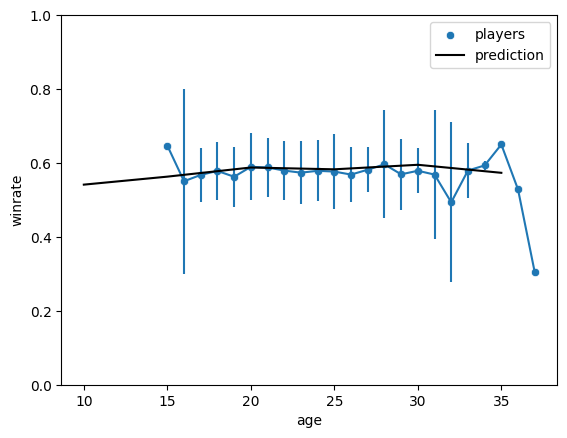

In [89]:
df_age_mean = df.groupby('age').mean()
df_age_std = df.groupby('age').std()

x = df_age_mean.index.get_level_values('age')
print(x)
print(df_age_mean.winrate)

scatter_plt = sns.scatterplot(data=df_age_mean, x="age", y="winrate")
scatter_plt.set(ylim=(0,1))
scatter_plt.errorbar(x=x, y=df_age_mean['winrate'], yerr=df_age_std['winrate'])
plt.plot(x_pred[:, 0], prediction, color='k', zorder=3)
plt.legend(labels=['players', 'prediction'])

In [15]:
x_pred = np.array([
    [23.084158, 171.061881, 0], #age  matches  tournaments
    [23.084158, 171.061881, 20], #age  matches  tournaments
    [23.084158, 171.061881, 40], #age  matches  tournaments
    [23.084158, 171.061881, 60], #age  matches  tournaments
    [23.084158, 171.061881, 80], #age  matches  tournaments
    [23.084158, 171.061881, 100], #age  matches  tournaments
]) 
prediction = model.predict(x_pred)

for i in range(x_pred[:, 0].size):
    print("X=%s, Predicted Winrate=%s" % (x_pred[i], prediction[i]))

1/1 [==============================] - 0s 16ms/step
X=[ 23.084158 171.061881   0.      ], Predicted Winrate=[0.76970726]
X=[ 23.084158 171.061881  20.      ], Predicted Winrate=[0.6213353]
X=[ 23.084158 171.061881  40.      ], Predicted Winrate=[0.5253982]
X=[ 23.084158 171.061881  60.      ], Predicted Winrate=[0.5641528]
X=[ 23.084158 171.061881  80.      ], Predicted Winrate=[0.612053]
X=[ 23.084158 171.061881 100.      ], Predicted Winrate=[0.6657899]


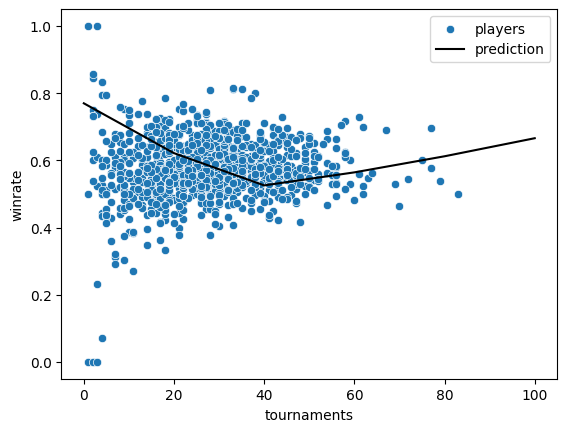

In [16]:
scatter_plt = sns.scatterplot(data=df, x="tournaments", y="winrate")
plt.plot(x_pred[:, 2], prediction, color='k')
plt.legend(labels=['players', 'prediction'])